In [247]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [248]:
def least_squares(y, tX):
    """calculate the least squares solution."""
    # ***************************************************
    w_optimal = np.linalg.solve(np.dot(tX.T,tX),np.dot(tX.T,y))
    error = y - np.dot(tX,w_optimal)
    mse =  np.inner(error,error) / np.shape(y)[0] / 2
    return w_optimal, mse
    # ***************************************************

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [249]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    #Normal equ
    w_opt1, mse = least_squares(y, tx)
    
    #grid search
    w0, w1 = generate_w()
    losses = grid_search(y, tx, w0, w1)
    lossmin, w0_opt2, w1_opt2 = get_best_parameters(w0, w1, losses)
    
    #GD
    w_initial = np.array([0, 0])
    loss, w_opt3 = leastsquaresGD(y, tx, w_initial, 500, 0.7)
    
    norm_NormalVsGrid = np.linalg.norm(np.array([w_opt1[0]-w0_opt2, w_opt1[1]-w1_opt2]))
    norm_NormalVsGD = np.linalg.norm(np.array([w_opt1-w_opt3]))
    return norm_NormalVsGrid, norm_NormalVsGD

Test it here

In [250]:
norm_NormalVsGrid, norm_NormalVsGD = test_your_least_squares()
print(norm_NormalVsGrid, norm_NormalVsGD) #GD est bcp mieux

Gradient Descent(0/499): loss=2792.236712759166, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(30/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(60/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(90/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(120/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(150/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(180/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(210/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(240/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(270/499): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(300/499): loss=15.385887868829

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [251]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [252]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    n = x.shape[0]
    tx_poly = np.zeros((n,degree))
    for i in range(n):
        for j in range(degree):
            tx_poly[i,j] = x[i]**j
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    return tx_poly

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [253]:
from plots import *

def compute_mse(y, tx, w):
    """Calculate the loss."""
    error = y - np.dot(tx,w).T
    print(error.shape, "wwww")
    return np.inner(error,error) / np.shape(y)[0] / 2

def polynomial_regression(x, y):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12] #indice de ou on se trouve dans le vect et degree = valeur
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        tx_poly = build_poly(x, degree)
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        weights, mse = least_squares(y, tx_poly)
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.7078805834165345
Processing 2th experiment, degree=3, rmse=0.466981968954414
Processing 3th experiment, degree=7, rmse=0.24969890274509077
Processing 4th experiment, degree=12, rmse=0.2411943685010285


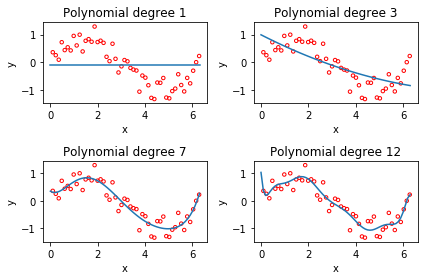

In [254]:
polynomial_regression(x,y)
#conclusion: deg 7 est le mieux, deg 12 overfit je pense

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [307]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    np.random.shuffle(x)
    np.random.shuffle(y)
    limit = int(ratio*x.shape[0])
    train_set_x = x[:limit]
    test_set_x = x[limit+1:]
    train_set_y = y[:limit]
    test_set_y = y[limit+1:]
    #train_set = zip(train_set_x, train_set_y)
    #test_set = zip(test_set_x, test_set_y)
    print(test_set_x[:10])
    return train_set_x, train_set_y, test_set_x, test_set_y

Then, test your `split_data` function below.

In [308]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    train_set_x, train_set_y, test_set_x, test_set_y = split_data(x, y, ratio, seed=1)
    # split the data, and return train and test data: TODO
    tx_poly_train = build_poly(train_set_x, degree)
    tx_poly_test = build_poly(test_set_x, degree)
    # form train and test data with polynomial basis function: TODO
    weights_train, mse = least_squares(train_set_y, tx_poly_train)
    # calculate weight through least square.: TODO
    rmse_tr = np.sqrt(2*mse)
    rmse_te = np.sqrt(2*compute_mse(test_set_y,tx_poly_test,weights_train))
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [309]:
seed = 6
degrees = [1,3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

#best is 90% train and 10% test

[1.48806201 3.25468638 2.87612401 1.74043692]
(4,) wwww
proportion=0.9, degree=1, Training RMSE=0.715, Testing RMSE=0.718
[1.2356871  5.65224803 6.0308104  1.61424946]
(4,) wwww
proportion=0.9, degree=3, Training RMSE=0.666, Testing RMSE=1.155
[1.48806201 5.90462294 3.7594362  3.50706129]
(4,) wwww
proportion=0.9, degree=7, Training RMSE=0.665, Testing RMSE=0.855
[1.2356871  3.38087384 6.15699785 3.12849893]
(4,) wwww
proportion=0.9, degree=12, Training RMSE=0.525, Testing RMSE=1.015
[6.28318531 1.99281183 0.85712473 5.14749821 4.39037348 4.01181111
 2.11899928 3.00231147 0.60474982 0.1       ]
(24,) wwww
proportion=0.5, degree=1, Training RMSE=0.754, Testing RMSE=0.673
[3.00231147 2.24518674 4.39037348 0.73093728 0.85712473 0.98331219
 0.60474982 3.63324875 2.49756165 2.74993656]
(24,) wwww
proportion=0.5, degree=3, Training RMSE=0.647, Testing RMSE=0.676
[3.63324875 2.87612401 0.85712473 2.11899928 4.39037348 0.35237491
 2.49756165 4.51656093 4.64274839 1.74043692]
(24,) wwww
proport

# 3 Ridge Regression
Please fill in the function below.

In [310]:
def ridge_regression(y, tX, lambda_):
    """implement ridge regression."""
    # ***************************************************
    n = np.shape(tX)[0]
    w_optimal = []
    if tX.ndim > 1:
        d = np.shape(tX)[1]
        w_optimal = np.linalg.solve((np.dot(tX.T,tX) + lambda_*n*2*np.eye(d)) ,np.dot(tX.T,y))
    else:
        d = 1
        w_optimal = np.dot(np.linalg.inv(np.dot(tX.T,tX) + lambda_*n*2*np.eye(d)),np.dot(tX.T,y))
    error = y - np.dot(tX,w_optimal)
    mse =  np.inner(error,error) / n / 2
    # ***************************************************
    return w_optimal, mse

train_set_x, train_set_y, test_set_x, test_set_y = split_data(x, y, 0.8, 1)
tx_poly_train = build_poly(train_set_x, 3)
tx_poly_test = build_poly(test_set_x, 3)    

w_initial = np.array([0, 0,0])
loss, w_opt3 = leastsquaresGD(train_set_y, tx_poly_train, w_initial, 500, 0.005)

w_optimal1, mse = ridge_regression(train_set_y, tx_poly_train, 0)
res = np.linalg.norm(np.array([w_optimal1-w_opt3]))
print(res)

[4.26418602 4.8951233  6.28318531 3.50706129 2.74993656 1.48806201
 4.76893584 0.47856237 4.64274839]
Gradient Descent(0/499): loss=0.23918480100446823, w0=-3.8193659749999985e-05, w1=-0.0003430475034308424
Gradient Descent(30/499): loss=0.2390044368282504, w0=0.0009159266377351634, w1=-0.0007011073009900828
Gradient Descent(60/499): loss=0.23899729083219895, w0=0.0018215289952234828, w1=-0.0011985381139092567
Gradient Descent(90/499): loss=0.23899031655096964, w0=0.002708020120125946, w1=-0.0017041909890381732
Gradient Descent(120/499): loss=0.23898350359922568, w0=0.0035771985856777257, w1=-0.0022157383143936848
Gradient Descent(150/499): loss=0.23897684388381446, w0=0.00443057785855281, w1=-0.0027312505194811505
Gradient Descent(180/499): loss=0.23897033092207245, w0=0.00526943368747369, w1=-0.0032491294440970433
Gradient Descent(210/499): loss=0.2389639593679543, w0=0.006094843553161817, w1=-0.003768053023904567
Gradient Descent(240/499): loss=0.23895772468251839, w0=0.006907719547

In [316]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 30)
    # ***************************************************
    train_set_x, train_set_y, test_set_x, test_set_y = split_data(x, y, ratio, seed)
    tx_poly_train = build_poly(train_set_x, degree)
    tx_poly_test = build_poly(test_set_x, degree)    

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        w_train, mse = ridge_regression(train_set_y, tx_poly_train, lambda_)
        rmse_tr.append(np.sqrt(2*mse))
        rmse_te.append(np.sqrt(2*compute_mse(test_set_y,tx_poly_test,w_train)))
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

[2.11899928 4.64274839 2.37137419 2.6237491  4.76893584 2.87612401
 5.14749821 5.39987312 1.86662437 4.01181111]
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.808
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.808
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.809
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.809
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.809
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.809
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.809
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.810
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.591, Testing RMSE=0.810
(24,) wwww
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.5

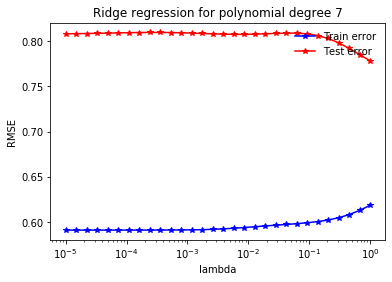

In [323]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)
#resultat dep fortement des CI, change a chaque fois a cause de shuffle malgré le seed, mais des fois c bon